In [2]:
import Pkg; Pkg.instantiate()

In [3]:
using Plots

We fix the truncation for the Galerkin approximation.

In [4]:
K = 256
N = 2*K+1

513

We start by defining the dynamic
$$ 
T_c(x) = 2x+c\cdot sinpi(2x)+0.25 \quad \textrm{mod $1$}
$$
with 
$c = \frac{1}{2\pi}-\frac{1}{16}$.

In [5]:
T(x; c) = 2*x+c*sinpi(2*x)+sqrt(2)/2#0.5*x*(1-x)

c = 1/(2*pi)-1/16
T(z) = T(z; c = c)

T (generic function with 1 method)

Let $S_{r} = \{x+i y \mid -r < |y| < r\}$.

We are interested in finding $\eta$, $\rho$ such that the closure $S_{\eta}$ is contained in $T_{c}(S_{\eta})$.
We are interested in maximizing $\rho-\eta$, since it is the constant appearing in the main error term of our functional analytic treatment, i.e.:
$$
||Lf-L_Kf||_{\ell^1}\leq \left(1+2\frac{e^{-2 \pi |\rho-\alpha|}}{1-e^{-2 \pi |\rho-\alpha|}}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\infty, \alpha}.	
$$

For $\rho>0$, we denote by $\mathcal{I}$ the imaginary part of a complex number,
$$
\alpha_u(\rho):=\min_{\theta \in [0,1]}|\mathcal{I}(T_c(x+i\rho))|
$$
where $_u$ stays for upper and 
$$
UR(\rho) := \alpha_u(\rho)-\rho.
$$
We would like to maximize the function $UR$.

In [6]:
α_u(ρ) = minimum(abs.(imag.(T.([x+im*ρ for x in 0:0.001:1]))))

function UR(ρ)   
    return α_u(ρ)-ρ
end

UR (generic function with 1 method)

Similarly, we would like to treat the image under the real axis; for $\rho>0$ we define 
$$
\alpha_l(\rho):=\min_{\theta \in [0,1]}|\mathcal{I}(T_c(x-i\rho))|
$$
where $_u$ stays for upper and 
$$
LR(\rho) := \alpha_u(\rho)-\rho.
$$
We would like to maximize the function $UR$.

In [7]:
α_l(ρ) = minimum(abs.(imag.(T.([x-im*ρ for x in 0:0.001:1]))))
    
function LR(ρ) 
    return α_l(ρ)-ρ
end 

LR (generic function with 1 method)

We define now 
$$
LR(\rho) = \min\{IR(\rho),OR(\rho)\}
$$
and maximise it.

In [8]:
ER(ρ) = min(LR(ρ), UR(ρ))

ER (generic function with 1 method)

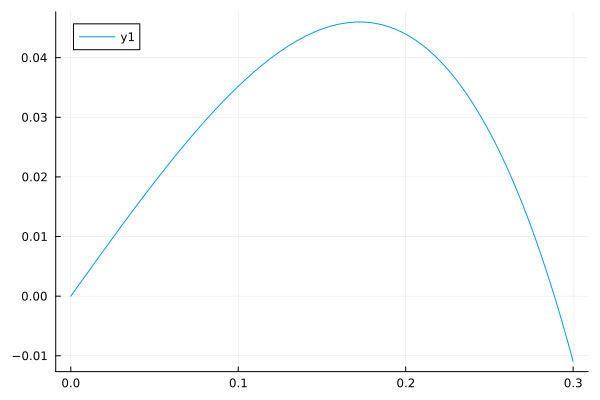

In [9]:
plot(ER, 0, 0.3)

In [10]:
η_rad = 0:0.01:1

bestrad, indexrad = findmax([ER(η) for η in η_rad])

η = η_rad[indexrad]

0.17

We move now to the strips

In [11]:
η_s = η
ρ_s = min(α_l(η), α_u(η))
η_s, ρ_s, ρ_s-η_s    

(0.17, 0.21597625701094017, 0.04597625701094016)

We want to find now an $\alpha$ that minimizes the right hand side of
$$
||Lf-L_Kf||_{\ell^1}\leq \left(1+2\frac{e^{-2 \pi |\rho-\alpha|}}{1-e^{-2 \pi |\rho-\alpha|}}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\infty, \alpha}	
$$


In [12]:
using IntervalArithmetic

In [13]:
function rhs(α, K; η, ρ)
    #Iα = interval(α)
    #Iη = interval(η)
    #Iρ = interval(ρ)
    Dρα = ρ-α
    Dαη = α-η
    coeff_1 = 1+2*(exp(-2*π*(Dρα)))/(1-(exp(-2*π*(Dρα))))
    coeff_2 = exp(-2*π*K*α)+exp(-2*π*K*(Dαη))
    return coeff_1*coeff_2
end

rhs (generic function with 1 method)

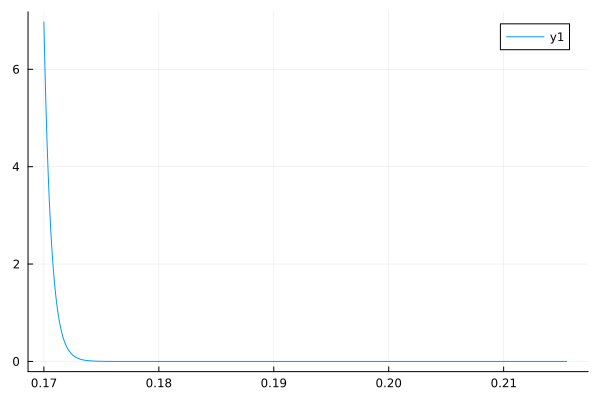

In [14]:
plot(α -> rhs(α, K; η = η_s, ρ = ρ_s), η_s, ρ_s)

In [15]:
α_arr = LinRange(η_s, ρ_s, 10000)
val_min, idx = findmin(map(α -> rhs(α, K; η = η_s, ρ = ρ_s), α_arr))
α_s = α_arr[idx]
val_min, α_s

(1.062574873895314e-29, 0.2153555154671381)

We compute now the right hand side, supposing $|\mu|>1/2$
$$
||f||_{\infty, \alpha} \leq \left(\frac{1}{|\mu|}\right)^{\frac{\alpha}{\alpha-\eta}} \left( 1+2\frac{e^{-2 \pi |\rho-\alpha|}}{1-e^{-2 \pi |\rho-\alpha|}}\right)^{\frac{\alpha}{\alpha-\eta}} ||f||_{\ell^1}.
$$


In [16]:
function weak_strong(μ; η, α, ρ)
    s = α/(α-η)
    coeff_1 = (1/abs(μ))^s
    coeff_2 = 1+2*(exp(-2*π*(ρ-α)))/(1-(exp(-2*π*(ρ-α))))^s
    return coeff_1*coeff_2
end

weak_strong (generic function with 1 method)

In [17]:
bws = weak_strong(0.2871; η = η_s, α = α_s, ρ = ρ_s)

2.063506362797094e14

Clearly, the number above is ugly, but the fact that the projection error is small balances out.

In [18]:
(bws*val_min)*sqrt(N)

4.9661980733105494e-14

In [19]:
import Pkg;
Pkg.activate("./");

  Activating project at `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks`


In [20]:
Pkg.rm("BallArithmetic")
Pkg.develop(url="/home/isaia/Coding/BallArithmetic.jl")

    Updating `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Project.toml`
  [77e4f72b] - BallArithmetic v0.1.0 `~/Coding/BallArithmetic.jl`
    Updating `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Manifest.toml`
  [77e4f72b] - BallArithmetic v0.1.0 `~/Coding/BallArithmetic.jl`
  [a74b3585] - Blosc v0.7.3
  [5789e2e9] - FileIO v1.16.3
  [c8ec2601] - H5Zblosc v0.1.2
  [f67ccb44] - HDF5 v0.17.2
  [4138dd39] - JLD v0.13.5
  [3da0fdf6] - MPIPreferences v0.1.11
  [0b7ba130] - Blosc_jll v1.21.5+0
  [0234f1f7] - HDF5_jll v1.12.2+2
  [5ced341a] - Lz4_jll v1.10.0+0
  [6cdc7f73] - OpenBLASConsistentFPCSR_jll v0.3.21+0
   Resolving package versions...
    Updating `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Project.toml`
  [77e4f72b] + BallArithmetic v0.1.0 `~/Coding/BallArithmetic.jl`
    Updating `~/Dropbox/Lavoro/C

In [21]:
using RigorousInvariantMeasures, BallArithmetic

Generating forwards to /home/isaia/.julia/artifacts/7e6d3d1a151a3d510c0e5a4c8f2c792f53e39777/lib/libopenblas64_.so (clear: 0, verbose: 1, suffix_hint: '(null)')
 -> Autodetected symbol suffix "64_"
 -> Autodetected interface ILP64 (64-bit)
 -> Autodetected normal complex return style
 -> Autodetected gfortran calling convention
 -> CBLAS detected
Processed 4949 symbols; forwarded 4860 symbols with 64-bit interface and mangling to a suffix of "64_"


┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/Coding/BallArithmetic.jl/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/Coding/BallArithmetic.jl/src/BallArithmetic.jl:27


In [22]:
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 32768)

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/0z5dS/src/Basis/Fourier/FourierAdjoint.jl:21


FFT on 32768 points restricted to highest frequency 256

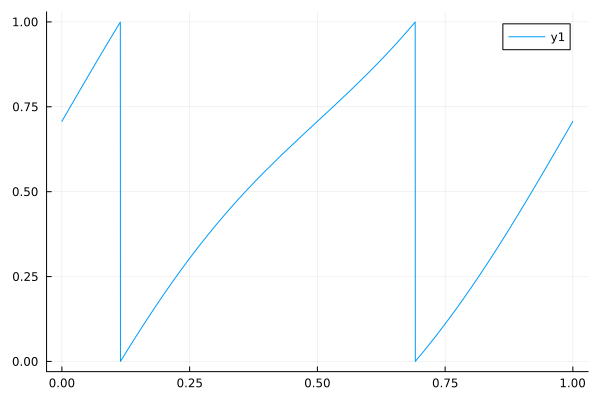

In [23]:
plot(x-> mod(T(x), 1), 0, 1)

In [24]:
savefig("2xplussome.png")

"/home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/2xplussome.png"

In [25]:
P = DiscretizedOperator(FourierBasis, T)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/0z5dS/src/GenericAssembler.jl:145
┌ Info: 513
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/0z5dS/src/Basis/Fourier/FourierCommon.jl:74
┌ Info: 256
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/0z5dS/src/Basis/Fourier/FourierCommon.jl:78
Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


NonIntegralPreservingDiscretizedOperator{LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Matrix{Complex{Interval{Float64}}}}, Vector{Float64}, LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Vector{Complex{Interval{Float64}}}}}(Complex{Interval{Float64}}[[0.999999, 1.00001] + [-2.21718e-14, 2.21718e-14]im [-2.21718e-14, 2.21718e-14] + [-2.21718e-14, 2.21718e-14]im … [-2.21718e-14, 2.21718e-14] + [-2.21718e-14, 2.21718e-14]im [-2.21718e-14, 2.21718e-14] + [-2.21718e-14, 2.21718e-14]im; [-0.011902, -0.0119019] + [0.0430875, 0.0430876]im [0.0771781, 0.0771782] + [-0.279402, -0.279401]im … [-9.25896e-05, -9.25895e-05] + [0.000335194, 0.000335195]im [0.00121404, 0.00121405] + [-0.00439511, -0.0043951]im; … ; [-0.00451614, -0.00451613] + [0.00270104, 0.00270105]im [0.000555419, 0.00055542] + [-0.00033219, -0.000332189]im … [-0.139681, -0.13968] + [0.0835409, 0.083541]im [0.0291901, 0.0291902] + [-0.0174583, -0.0174582]im; [-0.011902, -0.0119019] + [-0.0430876, -0.0430875]im [0.00121404, 

In [26]:
import IntervalArithmetic
midI = IntervalArithmetic.mid
radI = IntervalArithmetic.radius

radius (generic function with 4 methods)

In [27]:
midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))

513×513 Matrix{ComplexF64}:
         1.0+0.0im          …           0.0+0.0im
  -0.0119019+0.0430875im         0.00121405-0.00439511im
 -0.00451613-0.00270104im       0.000555419+0.000332189im
 0.000509405-0.000486378im      -6.73009e-5+6.42587e-5im
  4.71078e-5+8.77314e-5im       -6.46489e-6-1.20399e-5im
  -1.4156e-5+3.21414e-6im   …    1.98912e-6-4.51632e-7im
  9.97477e-8-2.15564e-6im       -1.42433e-8+3.0781e-7im
  3.09109e-7+1.00978e-7im       -4.46569e-8-1.45883e-8im
 -2.73415e-8+4.12577e-8im        3.98517e-9-6.01352e-9im
 -4.98301e-9-5.72705e-9im       7.31367e-10+8.40572e-10im
            ⋮               ⋱  
 -4.98301e-9+5.72705e-9im        3.20893e-8-3.68808e-8im
 -2.73415e-8-4.12577e-8im   …      1.761e-7+2.65731e-7im
  3.09109e-7-1.00978e-7im       -1.99129e-6+6.50505e-7im
  9.97477e-8+2.15564e-6im       -6.42747e-7-1.38904e-5im
  -1.4156e-5-3.21414e-6im        9.12497e-5+2.07184e-5im
  4.71078e-5-8.77314e-5im      -0.000303811+0.000565805im
 0.000509405+0.000486378im  …    

In [28]:
radP = sqrt.(radI.(real.(P.L))^2 + radI.(imag.(P.L))^2)

513×513 Matrix{Float64}:
 2.82043e-12  2.82043e-12  2.82043e-12  …  2.82043e-12  2.82043e-12
 2.98148e-12  2.98148e-12  2.98148e-12     2.98148e-12  2.98148e-12
 3.13045e-12  3.13045e-12  3.13045e-12     3.13045e-12  3.13045e-12
 3.28155e-12  3.28155e-12  3.28155e-12     3.28155e-12  3.28155e-12
 3.40899e-12  3.40899e-12  3.40899e-12     3.40899e-12  3.40899e-12
 3.55043e-12  3.55043e-12  3.55043e-12  …  3.55043e-12  3.55043e-12
 3.68231e-12  3.68231e-12  3.68231e-12     3.68231e-12  3.68231e-12
 3.78297e-12  3.78297e-12  3.78297e-12     3.78297e-12  3.78297e-12
 3.90701e-12  3.90701e-12  3.90701e-12     3.90701e-12  3.90701e-12
 4.04053e-12  4.04053e-12  4.04053e-12     4.04053e-12  4.04053e-12
 ⋮                                      ⋱               
 4.04053e-12  4.04053e-12  4.04053e-12     4.04053e-12  4.04053e-12
 3.90701e-12  3.90701e-12  3.90701e-12  …  3.90701e-12  3.90701e-12
 3.78297e-12  3.78297e-12  3.78297e-12     3.78297e-12  3.78297e-12
 3.68231e-12  3.68231e-12  3.68231

In [29]:
BallP = BallMatrix(midP, radP)

513×513 BallMatrix{Float64, ComplexF64, Ball{Float64, ComplexF64}, Matrix{ComplexF64}, Matrix{Float64}}:
                 1.0+0.0im ± 2.82043e-12  …                   0.0+0.0im ± 2.82043e-12
    -0.0119019+0.0430875im ± 2.98148e-12        0.00121405-0.00439511im ± 2.98148e-12
  -0.00451613-0.00270104im ± 3.13045e-12      0.000555419+0.000332189im ± 3.13045e-12
 0.000509405-0.000486378im ± 3.28155e-12       -6.73009e-5+6.42587e-5im ± 3.28155e-12
   4.71078e-5+8.77314e-5im ± 3.40899e-12       -6.46489e-6-1.20399e-5im ± 3.40899e-12
   -1.4156e-5+3.21414e-6im ± 3.55043e-12  …     1.98912e-6-4.51632e-7im ± 3.55043e-12
   9.97477e-8-2.15564e-6im ± 3.68231e-12        -1.42433e-8+3.0781e-7im ± 3.68231e-12
   3.09109e-7+1.00978e-7im ± 3.78297e-12       -4.46569e-8-1.45883e-8im ± 3.78297e-12
  -2.73415e-8+4.12577e-8im ± 3.90701e-12        3.98517e-9-6.01352e-9im ± 3.90701e-12
  -4.98301e-9-5.72705e-9im ± 4.04053e-12      7.31367e-10+8.40572e-10im ± 4.04053e-12
                                   

In [30]:
using Pseudospectra

Computing pseudospectra... 100%|████████████████████| Time: 0:00:08


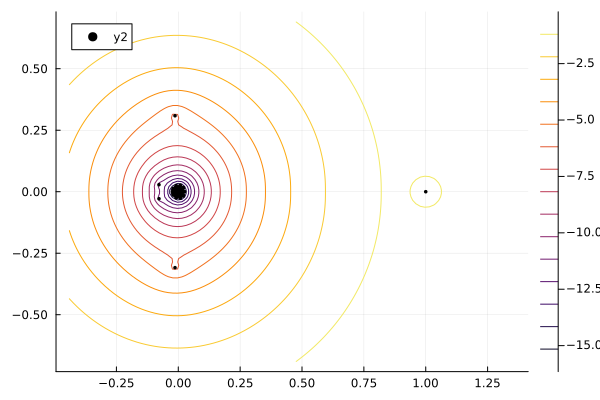

In [31]:
spectralportrait(midP)

In [32]:
savefig("Pseudospectra2xplussome.png")

"/home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Pseudospectra2xplussome.png"

In [33]:
using LinearAlgebra

In [34]:
abs.(diag(schur(midP).T))

513-element Vector{Float64}:
 0.30908330480137824
 0.30908330480135665
 0.0830455234569881
 0.08304552575179344
 0.027758393157480327
 0.026902535439271104
 0.02647661084205034
 0.027765132635516204
 0.026482186906543224
 0.026913097094676302
 ⋮
 2.150063641218786e-15
 2.2726383798395375e-15
 1.2241377553312538e-15
 8.755352375902097e-16
 2.5419238170943837e-15
 2.6206558067306372e-15
 8.168524741617043e-16
 1.917756361830122e-15
 1.0

With this discretization size we are not going to separate 
things that are separated by less than $0.0025$.
By inspecting the eigenvalues of the Schur matrix, we see that it may be difficult to separate the eigenvalues with norm $0.522...$, that corresponde to a double eigenvalue.
Therefore we resolve to enclose a bigger circle than $0.5$.  

In [35]:
λ = diag(schur(midP).T)[1]

-0.01319231361886436 + 0.3088016388692314im

In [36]:
ρ = 0.001
N = 128
step = range(start = 0, length = N, step = 1/N)

circ = [λ + ρ * exp(2*pi*im*θ) for θ in step]

128-element Vector{ComplexF64}:
 -0.012192313618864359 + 0.3088016388692314im
 -0.012193518162659187 + 0.30885070654355884im
 -0.012197128892192162 + 0.308899656009561im
  -0.01220313710889958 + 0.30894836934368675im
  -0.01221152833846113 + 0.30899672919124754im
 -0.012222282365669815 + 0.30904461904913466im
  -0.01223537328313215 + 0.30909192354648585im
 -0.012250769553681339 + 0.3091385287226236im
 -0.012268434086353072 + 0.3091843223015965im
 -0.012288324325740917 + 0.3092291939626617im
                       ⋮
 -0.012288324325740917 + 0.3083740837758011im
 -0.012268434086353074 + 0.3084189554368663im
 -0.012250769553681339 + 0.3084647490158392im
  -0.01223537328313215 + 0.30851135419197695im
 -0.012222282365669815 + 0.30855865868932814im
  -0.01221152833846113 + 0.30860654854721525im
  -0.01220313710889958 + 0.30865490839477605im
 -0.012197128892192162 + 0.3087036217289018im
 -0.012193518162659187 + 0.30875257119490396im

In [37]:
midP

513×513 Matrix{ComplexF64}:
         1.0+0.0im          …           0.0+0.0im
  -0.0119019+0.0430875im         0.00121405-0.00439511im
 -0.00451613-0.00270104im       0.000555419+0.000332189im
 0.000509405-0.000486378im      -6.73009e-5+6.42587e-5im
  4.71078e-5+8.77314e-5im       -6.46489e-6-1.20399e-5im
  -1.4156e-5+3.21414e-6im   …    1.98912e-6-4.51632e-7im
  9.97477e-8-2.15564e-6im       -1.42433e-8+3.0781e-7im
  3.09109e-7+1.00978e-7im       -4.46569e-8-1.45883e-8im
 -2.73415e-8+4.12577e-8im        3.98517e-9-6.01352e-9im
 -4.98301e-9-5.72705e-9im       7.31367e-10+8.40572e-10im
            ⋮               ⋱  
 -4.98301e-9+5.72705e-9im        3.20893e-8-3.68808e-8im
 -2.73415e-8-4.12577e-8im   …      1.761e-7+2.65731e-7im
  3.09109e-7-1.00978e-7im       -1.99129e-6+6.50505e-7im
  9.97477e-8+2.15564e-6im       -6.42747e-7-1.38904e-5im
  -1.4156e-5-3.21414e-6im        9.12497e-5+2.07184e-5im
  4.71078e-5-8.77314e-5im      -0.000303811+0.000565805im
 0.000509405+0.000486378im  …    

In [38]:
tsvd = @elapsed BallArithmetic.svdbox(BallP)

4.707804568

In [39]:
Vals = [svd(z*I-midP).S for z in circ]

128-element Vector{Vector{Float64}}:
 [1.3018231060680554, 1.2997152752721863, 1.2933376898872821, 1.2932989639672077, 1.2884020766792836, 1.2876822477225796, 1.2830181690374263, 1.2828690409792989, 1.2783033385633769, 1.277482536365378  …  0.0008130218650740014, 0.0007841920897058786, 0.0005192161214538528, 0.0005183948603814679, 0.00026783953876603, 0.00025173382731439144, 0.00011116574708468322, 0.0001037524261316795, 1.9751645686096215e-5, 5.059816402013268e-8]
 [1.3018700866645123, 1.29976186935558, 1.2933835378117688, 1.293344859082056, 1.2884474133217718, 1.2877274416721678, 1.2830629251863843, 1.282913776143573, 1.2783476548230464, 1.2775266793444329  …  0.0008138151965641936, 0.0007849613933140066, 0.0005197539432125673, 0.0005189318022608687, 0.0002681449512415233, 0.00025202189415994694, 0.00011130458179916012, 0.00010388284237604023, 1.978135471016115e-5, 5.066934178529079e-8]
 [1.3019170254860275, 1.299808435475782, 1.2934293600214832, 1.2933907266299847, 1.288492727993609

In [40]:
val, idx_min = findmin([x[end] for x in Vals])

(4.921278263429058e-8, 98)

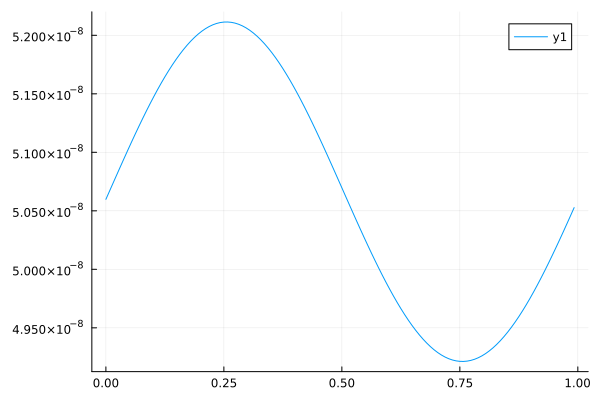

In [41]:
plot(step, [x[end] for x in Vals])

In [42]:
svd_avg = sum([x[end] for x in Vals])/N

r_small = svd_avg/10

((2*pi*ρ/(svd_avg/10)*tsvd*2)/3600)/24

135.17291756554036

In [43]:
import Pkg; Pkg.add("FFTW")
using FFTW

   Resolving package versions...
  No Changes to `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Project.toml`
  No Changes to `~/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/Manifest.toml`


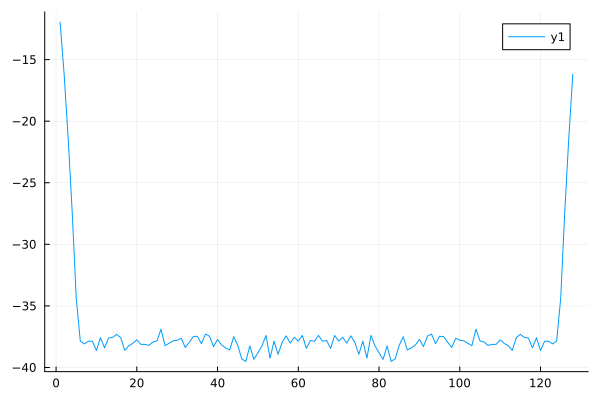

In [44]:
plot(log.(abs.(fft([x[end] for x in Vals]))))

In [45]:

function bound_resolvent_heuristic(λ, ρ, min_heur, r_small, errF, errT, norm_Z, norm_Z_inv)
    errZ = norm_Z.c + norm_Z.r - 1.0
    errZinv = norm_Z_inv.c + norm_Z_inv.r - 1.0

    ϵ = maximum([errF; errT; errZ; errZinv])
    abs_z = abs(λ)+ρ+r_small
    boundT = 1 / (min_heur-r_small)
    check = ϵ * abs_z * (1.0 + ϵ)^2 * boundT
    if check <= 0.5 
        temp = (1.0 + ϵ)^2 * (1.0 + 2.0 * ϵ * abs_z) * boundT
        bound = temp / (1 - ϵ * temp)
        return bound
    else
        @warn "We need a better schur decomposition"
    end
end


function certify_enclosure_heuristic(λ, ρ, min_heur, r_small, discr_error, weak_strong, errF, errT, norm_Z, norm_Z_inv)
    
    r = abs(λ)-ρ-r_small
    δ = bound_resolvent_heuristic(λ, ρ, min_heur, r_small, errF, errT, norm_Z, norm_Z_inv)
    left_side = r 
    right_side = weak_strong * discr_error * δ 
    @info left_side, right_side
    if left_side > right_side
        @info "This enclosure is a good candidate"
        return true
    else
        return false
    end
end

certify_enclosure_heuristic (generic function with 1 method)

In [46]:
#min_heur = minimum([x[end] for x in Vals])
min_heur = 3.892826231379485e-8

3.892826231379485e-8

In [47]:
certify_enclosure_heuristic(λ, ρ, min_heur, r_small, val_min, bws*sqrt(N), errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `errF` not defined

In [48]:
z = Ball(circ[idx_min], r_small)
σ = BallArithmetic.svdbox(BallP-z*I)[end]
certify_enclosure_heuristic(λ, ρ, σ.c-σ.r, r_small, val_min, bws*sqrt(N), errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `errF` not defined

In [49]:
function certify_enclosure(enc, discr_error, weak_strong, errF, errT, norm_Z, norm_Z_inv)
    N = length(enc.points)

    r = Inf
    for i in 1:N
        abs_z = abs(Ball(enc.points[i], enc.radiuses[i]))
        r = min(r, BallArithmetic.sub_down(abs_z.c, abs_z.r))
    end
    δ = BallArithmetic.bound_resolvent(enc, errF, errT, norm_Z, norm_Z_inv)
    left_side = r #BallArithmetic.div_down(1.0, r) # @down
    right_side = BallArithmetic.mul_up(BallArithmetic.mul_up(weak_strong, discr_error), δ) #up
    @info left_side, right_side
    if left_side > right_side
        @info "The enclosure of ", enc.λ, "is certified"
        return true
    else
        return false
    end
end

certify_enclosure (generic function with 1 method)

In [50]:
A = BallP

S = schur(Complex{Float64}.(A.c))

bZ = BallMatrix(S.Z)
errF = BallArithmetic.svd_bound_L2_opnorm(bZ' * bZ - I)

bT = BallMatrix(S.T)
errT = BallArithmetic.svd_bound_L2_opnorm(bZ * bT * bZ' - A)

sigma_Z = BallArithmetic.svdbox(bZ)

norm_Z = sigma_Z[1]
norm_Z_inv = 1.0 / sigma_Z[end]

eigv = diag(S.T)[[abs(x)>0.0001 for x in diag(S.T)]]

errF, errT, norm_Z, norm_Z_inv

(2.90158282280372e-11, 5.9672628586068656e-9, Ball{Float64, Float64}(1.0000000000000044, 1.7381851513675883e-10), Ball{Float64, Float64}(1.0000000000000047, 1.7381884820366625e-10))

In [51]:
eigv

265-element Vector{ComplexF64}:
    -0.01319231361886436 + 0.3088016388692314im
   -0.013192313618883261 - 0.30880163886920897im
    -0.07803321173597269 - 0.02841437721319992im
    -0.07803321433705747 + 0.02841437677688244im
    0.008068638754261788 + 0.026559846749152665im
     0.02038593349969714 + 0.01755449026338172im
   -0.008795327822571083 + 0.024973048075372872im
    0.008066946371915677 - 0.026567404210807714im
   -0.008797678861119906 - 0.02497813183586181im
     0.02038848852107966 - 0.017567707051669466im
                         ⋮
   -9.285441823954215e-5 - 9.431790452021334e-5im
    9.398802097525541e-5 - 8.928745312658041e-5im
   -8.582318437927753e-5 + 8.784337294370259e-5im
    9.179980900308801e-5 + 8.399859035346391e-5im
  0.00012068733128119867 - 1.2285449833510286e-6im
 -0.00010897379389170939 + 4.3823199308692985e-6im
   1.0935538357205254e-5 + 0.00010460090522173876im
   1.2055440406103176e-5 - 0.00010040332055555556im
                     1.0 + 0.0im

In [52]:
abs.(eigv)

265-element Vector{Float64}:
 0.30908330480137824
 0.30908330480135665
 0.0830455234569881
 0.08304552575179344
 0.027758393157480327
 0.026902535439271104
 0.02647661084205034
 0.027765132635516204
 0.026482186906543224
 0.026913097094676302
 ⋮
 0.00013235486428419583
 0.00012963794727114566
 0.00012280910856742624
 0.00012443057548035562
 0.0001206935841482633
 0.00010906187456269607
 0.00010517098160789925
 0.0001011244798353334
 1.0

In [53]:
lambda0 = eigv[1]

third, ind = findmax(abs.(eigv[3:end-1]))
@info ind, third


lambda1 = eigv[4]

dt = LinRange(0, 1, 1000)

lin_interpol = [lambda0+t*(lambda1-lambda0) for t in dt]

norm_res = [svd((lambda*I-midP)).S[end] for lambda in lin_interpol]

min_res_norm, ind = findmax(norm_res)
@info ind, min_res_norm
@info abs.(lin_interpol)[ind]

plot(abs.(lin_interpol)[2:end-1], norm_res[2: end-1])
scatter!(abs.(lin_interpol)[2:end-1][ind], min_res_norm)

#E = BallArithmetic._compute_exclusion_circle_level_set_priori(
#            F.T, λ, 2^(-20); rel_pearl_size = 1/128, max_initial_newton = 100)

┌ Info: (2, 0.08304552575179344)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y115sZmlsZQ==.jl:4
┌ Info: (113, 6.36351520069046e-7)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y115sZmlsZQ==.jl:16
┌ Info: 0.27812055400531616
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y115sZmlsZQ==.jl:17


ErrorException: Cannot convert Float64 to series data for plotting

In [104]:
min_res_norm, i = findmin(norm_res)
@info dt[i], min_res_norm

exclusion_radius = abs(lambda0+dt[i]*(lambda1-lambda0))

┌ Info: (0.08080808080808081, 7.27410032756213e6)
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X64sZmlsZQ==.jl:2


0.2821493779929877

In [105]:
bws = weak_strong(exclusion_radius; η = η_s, α = α_s, ρ = ρ_s)

4.798320690499512e15

In [106]:
U = UpperTriangular(S.T)

1025×1025 UpperTriangular{ComplexF64, Matrix{ComplexF64}}:
 -0.0131923+0.308802im  …     0.0409628+0.019262im
            ⋅                 0.0231759+0.0382466im
            ⋅               0.000693511+0.00122054im
            ⋅               0.000733224+0.00116558im
            ⋅                6.98352e-6-5.77783e-6im
            ⋅           …     -1.887e-5+1.26239e-5im
            ⋅                -2.8222e-6-5.59094e-6im
            ⋅               -9.30389e-7+1.31467e-6im
            ⋅                5.09324e-8+3.04386e-8im
            ⋅               -2.84627e-8-1.66334e-7im
           ⋮            ⋱  
            ⋅              -4.44203e-17-1.35597e-15im
            ⋅               5.88549e-16-7.1646e-16im
            ⋅              -4.36029e-16+2.55996e-16im
            ⋅              -8.46039e-16-8.58637e-18im
            ⋅           …    1.2639e-15-5.14246e-16im
            ⋅               2.55591e-16+9.09907e-16im
            ⋅              -1.58639e-16+8.52977e-16im
         

In [330]:
@time svd(midP)

  0.388330 seconds (14 allocations: 89.330 MiB)


SVD{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
U factor:
1025×1025 Matrix{ComplexF64}:
  0.0711999+4.33681e-18im  …  -3.37837e-16-1.05677e-15im
 -0.0189568+0.0686276im        6.79345e-16+1.24154e-15im
 -0.0610972-0.0365414im        7.05128e-16-9.22006e-16im
  0.0514817-0.0491546im       -8.81693e-16-1.09442e-15im
  0.0336655+0.0626971im       -8.96263e-17+2.83325e-15im
 -0.0693776+0.0157523im    …   1.78383e-15+1.90981e-18im
 0.00328735-0.0710426im        3.69115e-16-1.87024e-16im
   0.067575+0.0220751im       -5.93034e-16+5.88491e-16im
 -0.0392517+0.0592299im        6.57038e-16-1.77814e-16im
 -0.0466157-0.0535762im       -1.33145e-15+2.99295e-16im
           ⋮               ⋱  
 -0.0466157+0.0535762im        1.00169e-15-1.56676e-16im
 -0.0392517-0.0592299im       -9.65222e-16+8.13003e-16im
   0.067575-0.0220751im        1.96163e-15-7.71539e-17im
 0.00328735+0.0710426im       -3.06137e-16-2.45421e-16im
 -0.0693776-0.0157523im    …  -4.39527e-16+6.90915e-16im
  0.0336655-

In [332]:
@time BallArithmetic.svdbox(BallP)

  0.819851 seconds (10.56 k allocations: 651.228 MiB, 1.25% gc time)


1025-element Vector{Ball{Float64, Float64}}:
      1.0495541386383156 ± 3.171231433007904e-8
     1.0495474200615371 ± 3.1712312775766804e-8
     1.0495362238303336 ± 3.1712310111231545e-8
     1.0495205520391937 ± 3.1712306558517867e-8
      1.0495004076190129 ± 3.171230211762577e-8
      1.0494757943357453 ± 3.171229634446604e-8
        1.049446716788669 ± 3.17122899051725e-8
      1.049413180408219 ± 3.1712282133611325e-8
       1.049375191453494 ± 3.171227369591634e-8
      1.0493327570093278 ± 3.171226392595372e-8
                                                                     ⋮
  6.686352982829604e-16 ± 3.1474008654774716e-8
  5.624125028752694e-16 ± 3.1474008654774716e-8
  5.353511766390338e-16 ± 3.1474008654774716e-8
  4.853344171167043e-16 ± 3.1474008654774716e-8
 4.0410374571678004e-16 ± 3.1474008654774716e-8
  2.896143587301402e-16 ± 3.1474008654774716e-8
 1.7546762304044437e-16 ± 3.1474008654774716e-8
 1.2281886083575484e-16 ± 3.1474008654774716e-8
  6.297738601055741e

In [108]:
# λ = eigv[end]
# @info λ
# ϵ = 0.000001
# target = 2 * ϵ
# E1 = BallArithmetic._compute_enclosure_ode(U, λ, ϵ; target = target,  max_initial_newton = 100, max_steps = 1000)

┌ Info: 1.0 + 0.0im
└ @ Main /home/isaia/Dropbox/Lavoro/Collaborators/Blumenthal-Nisoli-Taylor-Crush/DraftPseudospectra/current/Julia_notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y101sZmlsZQ==.jl:2


UndefVarError: UndefVarError: `_compute_enclosure_ode` not defined

In [109]:
# @info 1/(sqrt(N)*BallArithmetic.bound_resolvent(E1, errF, errT, norm_Z, norm_Z_inv))
# certify_enclosure(E1, val_min, bws*sqrt(N), errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `E1` not defined

In [110]:
# λ = eigv[1]
# # @info λ
# ϵ = (1e-9)
# target = 1e-8
# E2 = BallArithmetic._compute_exclusion_circle_level_set_priori(U,
# λ,
# target; N = 1024, max_initial_newton = 10)
# #E2 = BallArithmetic._certify_circle(U, λ, target, 10)
# #E2 = BallArithmetic._compute_enclosure_ode(U, λ, ϵ; target = target,  max_initial_newton = 100, max_steps = 1000)

UndefKeywordError: UndefKeywordError: keyword argument `rel_pearl_size` not assigned

In [111]:
# minimum([x.c for x in E2.bounds])

UndefVarError: UndefVarError: `E2` not defined

In [112]:
# plot(E2.points)

UndefVarError: UndefVarError: `E2` not defined

In [113]:
# E2ref = BallArithmetic._refine_enclosure_newton_flow(U, E2, target; rel_err = 1/32, τ = 1)

UndefVarError: UndefVarError: `_refine_enclosure_newton_flow` not defined

In [114]:

# E2ref = BallArithmetic._refine_enclosure_newton_flow(U, E2ref, target; rel_err = 1/1024, τ = 1)


UndefVarError: UndefVarError: `_refine_enclosure_newton_flow` not defined

In [115]:
# plot(E2.points)
# plot!(E2ref.points)
# scatter!([λ])

UndefVarError: UndefVarError: `E2` not defined

In [116]:
# # we refine to guarantee >ϵ
# E2ref = BallArithmetic._refine_enclosure_guarantee(U, E2ref, ϵ) 

UndefVarError: UndefVarError: `_refine_enclosure_guarantee` not defined

In [117]:
length(E2ref.points)

UndefVarError: UndefVarError: `E2ref` not defined

In [118]:
minimum([x.c for x in E2ref.bounds])

UndefVarError: UndefVarError: `E2ref` not defined

In [119]:
minimum([x.c-x.r for x in E2ref.bounds])

UndefVarError: UndefVarError: `E2ref` not defined

In [120]:
@info 1/(sqrt(N)*BallArithmetic.bound_resolvent(E2, errF, errT, norm_Z, norm_Z_inv))
certify_enclosure(E2, val_min, bws*sqrt(N), errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `E2` not defined

In [121]:
E2.points

UndefVarError: UndefVarError: `E2` not defined

In [122]:
plot(E2.points)

UndefVarError: UndefVarError: `E2` not defined

In [123]:
# λ = eigvals[3]
# @info λ
# ϵ = 0.00000001
# target = 2 * ϵ
# E3 = BallArithmetic._compute_enclosure_ode(F.T, λ, ϵ; target = target,  max_initial_newton = 100, max_steps = 1000)

In [124]:
@info 1/(sqrt(N)*BallArithmetic.bound_resolvent(E3, errF, errT, norm_Z, norm_Z_inv))
certify_enclosure(E3, val_min, bws*sqrt(N), errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `E3` not defined

In [125]:
E_circ = BallArithmetic._compute_central_exclusion_circle(T, exclusion_radius; max_steps = 1000, rel_steps = 1024)

UndefVarError: UndefVarError: `_compute_central_exclusion_circle` not defined

In [126]:
BallArithmetic.bound_resolvent(E_circ, errF, errT, norm_Z, norm_Z_inv)

UndefVarError: UndefVarError: `E_circ` not defined

In [127]:
# using Plots

In [128]:
# @recipe function f(::Type{BallArithmetic.Enclosure}, E::BallArithmetic.Enclosure)
#     val_sen = [sen(2*π*x) for x in 0:0.1:1]
#     val_cos = [sen(2*π*x) for x in 0:0.1:1]
    
#     out_x = []
#     out_y = []

#     for (i, z) in enumerate(E.points)
#         append!(out_x, z.+ E.radiuses[i]*val_cos)
#         append!(out_y, z.+ E.radiuses[i]*val_sen)
#     end

#     return out_x, out_y
# end

In [129]:
# λ = eigvals[4]
# @info λ
# ϵ = 0.00001
# target = 2 * ϵ
# E = BallArithmetic._compute_enclosure_ode(F.T, λ, ϵ; target = target,  max_initial_newton = 100, max_steps = 1000)

In [130]:
1.93*10.0^(36-47)*9/(0.5)

3.4739999999999996e-10

In [131]:
bigger_radius_square(ρ) = minimum(abs.(B.([ρ * exp(im * 2 * π * θ) for θ in 0:0.001:1]))) - ρ^2

bigger_radius_square (generic function with 1 method)

In [132]:
smaller_radius_square(ρ) = 1 / ρ^2 - maximum(abs.(B.([exp(im * 2 * π * θ) / ρ for θ in 0:0.001:1])))

smaller_radius_square (generic function with 1 method)

In [133]:
radius_square(ρ) = min(bigger_radius_square(ρ), smaller_radius_square(ρ))

radius_square (generic function with 1 method)